# Assignment 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Forces removal of some deprecated behaviors in pandas.
pd.set_option('future.no_silent_downcasting', True)

In [2]:
df = pd.read_csv("Housing.csv")

# Replace "yes" and "no" with 1 and 0.
df = df.replace({"yes", "no"}, {1, 0}).infer_objects(copy=False)

# Split into train and test datasets with 80% / 20% split
train = df.sample(frac=0.8, random_state=1)
test = df.drop(train.index)

train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,4.360000e+02,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,4.746431e+06,5132.231651,2.931193,1.282110,1.795872,0.857798,0.188073,0.341743,0.041284,0.316514,0.690367,0.231651
std,1.862407e+06,2152.938969,0.739580,0.498966,0.872086,0.349658,0.391220,0.474839,0.199176,0.465650,0.861967,0.422372
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.428250e+06,3520.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.329500e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.804750e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,15600.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


### Cost function and gradient descent for problems 1 and 2

In [3]:
def cost(theta, X, Y):
    error = X.dot(theta) - Y
    cost = np.sum(np.square(error)) / (2* len(Y))
    return cost

def grad_desc(iterations, theta, learning_rate, X, Y, X_test, Y_test):
    cost_history = np.zeros(iterations)
    val_history = np.zeros(iterations)
    for i in range(iterations):
        errors = X.dot(theta) - Y
        partials = errors.dot(X)
        theta -= (learning_rate / len(Y)) * partials
        # Update losses
        cost_history[i] = cost(theta, X,Y)
        val_history[i] = cost(theta, X_test, Y_test)
    return theta, cost_history, val_history

## Problem 1a

In [4]:
# Set up our training data
Y = train.price.to_numpy()
X = train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()
X_0 = np.ones((len(X),1))
X = np.hstack((X_0, X))

# Set up our testing data
Y_test = test.price.to_numpy()
X_test = test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()
X_0 = np.ones((len(X_test),1))
X_test = np.hstack((X_0, X_test))

Theta:       [ 43.49272125 854.26820665 165.08367069  93.48292697 144.88644639
  33.80054902]
Train Loss:  [1.69146285e+12 1.69146260e+12 1.69146235e+12 1.69146210e+12
 1.69146185e+12]
Test Loss:   [1.59871417e+12 1.59871392e+12 1.59871368e+12 1.59871344e+12
 1.59871320e+12]


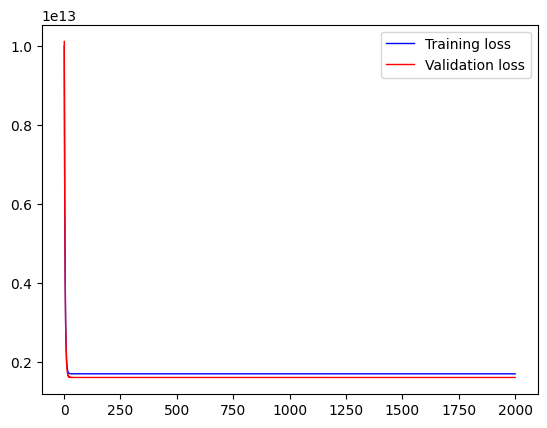

In [5]:
# Training hyperparameters
learning_rate = 0.00000006
iterations = 2000
theta_0 = np.zeros(X.shape[1])

# Train the model
theta, cost_h, validation_h = grad_desc(iterations, theta_0, learning_rate, X, Y, X_test, Y_test)

print("Theta:      ", theta)
print("Train Loss: ", cost_h[-5:])
print("Test Loss:  ", validation_h[-5:])

# Plot the results
plt.figure()
plt.plot(range(1, iterations+1), cost_h, color="blue", label="Training loss", linewidth=1)
plt.plot(range(1, iterations+1), validation_h, color="red", label="Validation loss", linewidth=1)
plt.legend();

## Problem 1b

In [6]:
# Set up our training data
Y = train.price.to_numpy()
X = train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].to_numpy()
X_0 = np.ones((len(X),1))
X = np.hstack((X_0, X))

# Set up our testing data
Y_test = test.price.to_numpy()
X_test = test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].to_numpy()
X_0 = np.ones((len(X_test),1))
X_test = np.hstack((X_0, X_test))

Theta:       [ 43.49242416 854.25721783 165.08271918  93.48246263 144.8857358
  37.18451829  18.14391162  26.08142705   6.70443091  39.7681697
  33.80045437  18.3032828 ]
Train Loss:  [1.69142672e+12 1.69142645e+12 1.69142619e+12 1.69142592e+12
 1.69142565e+12]
Test Loss:   [1.59867519e+12 1.59867493e+12 1.59867467e+12 1.59867441e+12
 1.59867415e+12]


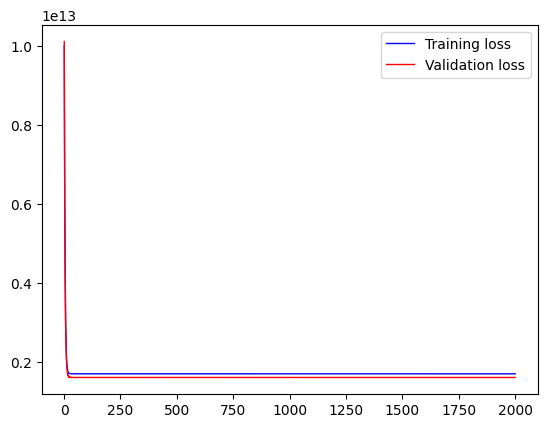

In [7]:
# Training hyperparameters
learning_rate = 0.00000006
iterations = 2000
theta_0 = np.zeros(X.shape[1])

# Train the model
theta, cost_h, validation_h = grad_desc(iterations, theta_0, learning_rate, X, Y, X_test, Y_test)

print("Theta:      ", theta)
print("Train Loss: ", cost_h[-5:])
print("Test Loss:  ", validation_h[-5:])

# Plot the results
plt.figure()
plt.plot(range(1, iterations+1), cost_h, color="blue", label="Training loss", linewidth=1)
plt.plot(range(1, iterations+1), validation_h, color="red", label="Validation loss", linewidth=1)
plt.legend();

## Problem 2a
### MIN MAX Normalization Approach

In [8]:
# Set up our training data
Y = train.price.to_numpy()
X = train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()

# Set up our testing data
Y_test = test.price.to_numpy()
X_test = test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()

# Scale features using MIN MAX normalization
scaler = preprocessing.MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# Add row of ones to each.
X_0 = np.ones((len(X),1))
X = np.hstack((X_0, X))

X_0 = np.ones((len(X_test),1))
X_test = np.hstack((X_0, X_test))

Theta:       [2364938.94951025 3192331.66660325 1370992.87186982 2595092.78926102
 1788785.70746482 1481425.72294357]
Train Loss:  [7.88801392e+11 7.88695555e+11 7.88590165e+11 7.88485219e+11
 7.88380715e+11]
Test Loss:   [8.32952255e+11 8.32781498e+11 8.32611379e+11 8.32441896e+11
 8.32273045e+11]


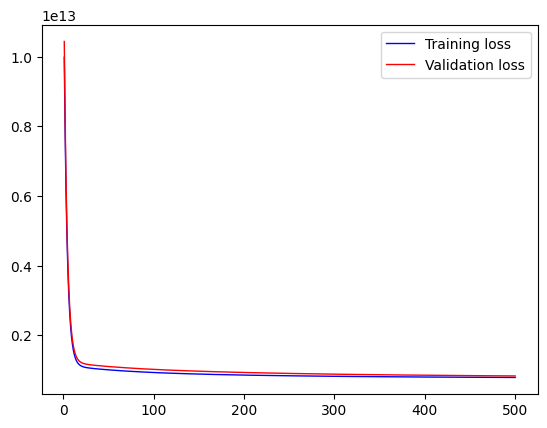

In [9]:
# Training hyperparameters
learning_rate = 0.1
iterations = 500
theta_0 = np.zeros(X.shape[1])

# Train the model
theta, cost_h, validation_h = grad_desc(iterations, theta_0, learning_rate, X, Y, X_test, Y_test)

print("Theta:      ", theta)
print("Train Loss: ", cost_h[-5:])
print("Test Loss:  ", validation_h[-5:])

# Plot the results
plt.figure()
plt.plot(range(1, iterations+1), cost_h, color="blue", label="Training loss", linewidth=1)
plt.plot(range(1, iterations+1), validation_h, color="red", label="Validation loss", linewidth=1)
plt.legend();

### Standardization Approach:

In [10]:
# Set up our training data
Y = train.price.to_numpy()
X = train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()

# Set up our testing data
Y_test = test.price.to_numpy()
X_test = test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()

# Scale features using standardization.
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# Add row of ones to each.
X_0 = np.ones((len(X),1))
X = np.hstack((X_0, X))

X_0 = np.ones((len(X_test),1))
X_test = np.hstack((X_0, X_test))

Theta:       [4721969.35861473  679844.60499427  155365.86170515  561955.52500774
  473703.71559202  321177.03289402]
Cost:        [7.63487585e+11 7.63336160e+11 7.63212070e+11 7.63110288e+11
 7.63026721e+11]
Validation:  [7.81302263e+11 7.81146455e+11 7.81015497e+11 7.80904834e+11
 7.80810778e+11]


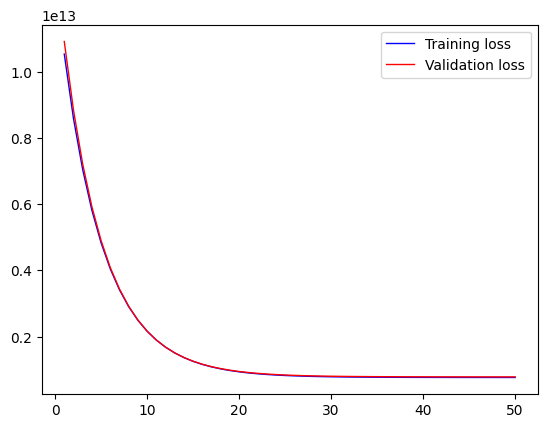

In [11]:
# Training hyperparameters
learning_rate = 0.1
iterations = 50
theta_0 = np.zeros(X.shape[1])

# Train the model
theta, cost_h, validation_h = grad_desc(iterations, theta_0, learning_rate, X, Y, X_test, Y_test)

print("Theta:      ", theta)
print("Cost:       ", cost_h[-5:])
print("Validation: ", validation_h[-5:])
# Plot the results
plt.figure()
plt.plot(range(1, iterations+1), cost_h, color="blue", label="Training loss", linewidth=1)
plt.plot(range(1, iterations+1), validation_h, color="red", label="Validation loss", linewidth=1)
plt.legend();

## Problem 2b
### MIN MAX Normalization Approach

In [12]:
# Set up our training data
Y = train.price.to_numpy()
X = train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].to_numpy()

# Set up our testing data
Y_test = test.price.to_numpy()
X_test = test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].to_numpy()

# Scale features using standardization.
scaler = preprocessing.MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# Add row of ones to each.
X_0 = np.ones((len(X),1))
X = np.hstack((X_0, X))

X_0 = np.ones((len(X_test),1))
X_test = np.hstack((X_0, X_test))

Theta:       [1728327.79980669 2098703.68602144 1195470.56371486 2209165.19340967
 1367919.51139601  553674.55222057  429149.54182832  277180.54548311
  968208.08596343 1100637.17762072 1197297.70301025  641766.06641938]
Train Loss:  [5.69688426e+11 5.69623127e+11 5.69558109e+11 5.69493370e+11
 5.69428910e+11]
Test Loss:   [7.29416085e+11 7.29266131e+11 7.29116664e+11 7.28967681e+11
 7.28819179e+11]


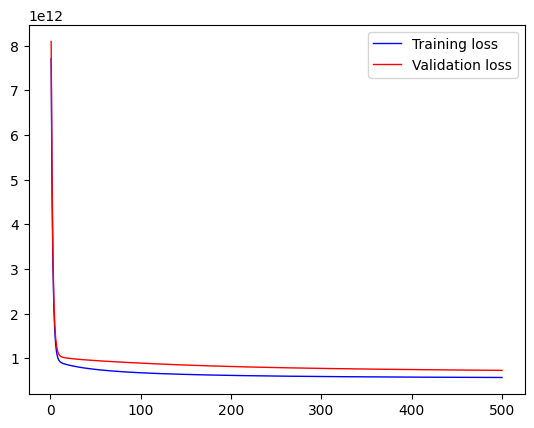

In [13]:
# Training hyperparameters
learning_rate = 0.1
iterations = 500
theta_0 = np.zeros(X.shape[1])

# Train the model
theta, cost_h, validation_h = grad_desc(iterations, theta_0, learning_rate, X, Y, X_test, Y_test)

print("Theta:      ", theta)
print("Train Loss: ", cost_h[-5:])
print("Test Loss:  ", validation_h[-5:])

# Plot the results
plt.figure()
plt.plot(range(1, iterations+1), cost_h, color="blue", label="Training loss", linewidth=1)
plt.plot(range(1, iterations+1), validation_h, color="red", label="Validation loss", linewidth=1)
plt.legend();

### Standardization Approach

In [14]:
# Set up our training data
Y = train.price.to_numpy()
X = train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].to_numpy()

# Set up our testing data
Y_test = test.price.to_numpy()
X_test = test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].to_numpy()

# Scale features using standardization.
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# Add row of ones to each.
X_0 = np.ones((len(X),1))
X = np.hstack((X_0, X))

X_0 = np.ones((len(X_test),1))
X_test = np.hstack((X_0, X_test))

Theta:       [4721969.35861473  474754.25610075  140963.60234845  485297.79021511
  367814.42145839  165319.53400566  150302.91107134  126117.37663448
  212862.72577727  479675.09832774  269488.04818983  253466.1698595 ]
Train Loss:  [5.53789487e+11 5.53645942e+11 5.53528760e+11 5.53433024e+11
 5.53354740e+11]
Test Loss:   [6.69664770e+11 6.69509469e+11 6.69373125e+11 6.69251917e+11
 6.69142819e+11]


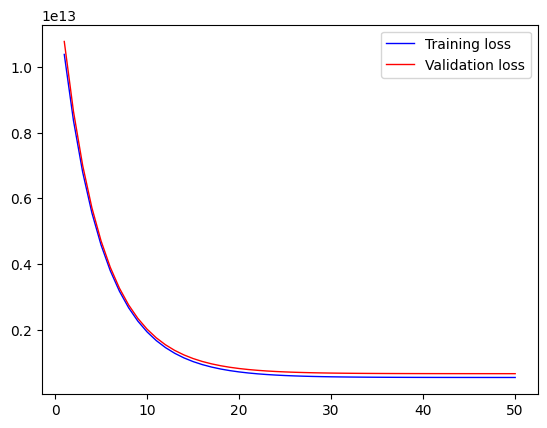

In [15]:
# Training hyperparameters
learning_rate = 0.1
iterations = 50
theta_0 = np.zeros(X.shape[1])

# Train the model
theta, cost_h, validation_h = grad_desc(iterations, theta_0, learning_rate, X, Y, X_test, Y_test)

print("Theta:      ", theta)
print("Train Loss: ", cost_h[-5:])
print("Test Loss:  ", validation_h[-5:])

# Plot the results
plt.figure()
plt.plot(range(1, iterations+1), cost_h, color="blue", label="Training loss", linewidth=1)
plt.plot(range(1, iterations+1), validation_h, color="red", label="Validation loss", linewidth=1)
plt.legend();

## Problem 3

In [16]:
def cost(theta, X, Y):
    error = X.dot(theta) - Y
    cost = np.sum(np.square(error)) / (2* len(Y))
    return cost

def grad_desc(iterations, theta, learning_rate, reg_param, X, Y, X_test, Y_test):
    cost_history = np.zeros(iterations)
    val_history = np.zeros(iterations)
    for i in range(iterations):
        # Calculate parial derivatives
        errors = X.dot(theta) - Y
        partials = errors.dot(X)

        # Calculate regularization terms (no regularization on the constant term)
        regularization = reg_param * theta
        regularization[0] = 0

        # Update theta
        theta -= (learning_rate / len(Y)) * (partials + regularization)

        # Update losses
        cost_history[i] = cost(theta, X,Y)
        val_history[i] = cost(theta, X_test, Y_test)
    return theta, cost_history, val_history

## Problem 3a

In [17]:
# Set up our training data
Y = train.price.to_numpy()
X = train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()

# Set up our testing data
Y_test = test.price.to_numpy()
X_test = test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()

# Scale features using standardization.
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# Add row of ones to each.
X_0 = np.ones((len(X),1))
X = np.hstack((X_0, X))

X_0 = np.ones((len(X_test),1))
X_test = np.hstack((X_0, X_test))

Theta:       [4721969.35861473  574654.26540056  177956.9864179   488176.37403813
  409096.70831121  304442.6416289 ]
Train Loss:  [7.78457334e+11 7.78292086e+11 7.78154927e+11 7.78040798e+11
 7.77945578e+11]
Test Loss:   [8.08170994e+11 8.08028814e+11 8.07911973e+11 8.07815737e+11
 8.07736271e+11]


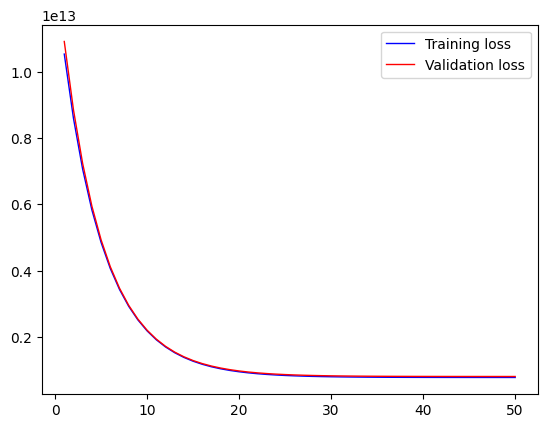

In [18]:
# Training hyperparameters
learning_rate = 0.1
regularization_parameter = 100
iterations = 50
theta_0 = np.zeros(X.shape[1])

# Train the model
theta, cost_h, validation_h = grad_desc(iterations, theta_0, learning_rate, regularization_parameter, X, Y, X_test, Y_test)

print("Theta:      ", theta)
print("Train Loss: ", cost_h[-5:])
print("Test Loss:  ", validation_h[-5:])

# Plot the results
plt.figure()
plt.plot(range(1, iterations+1), cost_h, color="blue", label="Training loss", linewidth=1)
plt.plot(range(1, iterations+1), validation_h, color="red", label="Validation loss", linewidth=1)
plt.legend();

## Problem 3b
Again, standardization worked best, so it is used again here.

In [19]:
# Set up our training data
Y = train.price.to_numpy()
X = train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].to_numpy()

# Set up our testing data
Y_test = test.price.to_numpy()
X_test = test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].to_numpy()

# Scale features using standardization.
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

# Add row of ones to each.
X_0 = np.ones((len(X),1))
X = np.hstack((X_0, X))

X_0 = np.ones((len(X_test),1))
X_test = np.hstack((X_0, X_test))

Theta:       [4721969.35861473  418582.2304778   159095.1671327   426179.72573727
  328620.39288149  166542.66014265  147613.12980978  110567.7926081
  170763.44496666  420566.96969623  256860.56037681  228185.118415  ]
Train Loss:  [5.65902673e+11 5.65750155e+11 5.65624611e+11 5.65521090e+11
 5.65435565e+11]
Test Loss:   [6.79498029e+11 6.79358223e+11 6.79242000e+11 6.79144907e+11
 6.79063352e+11]


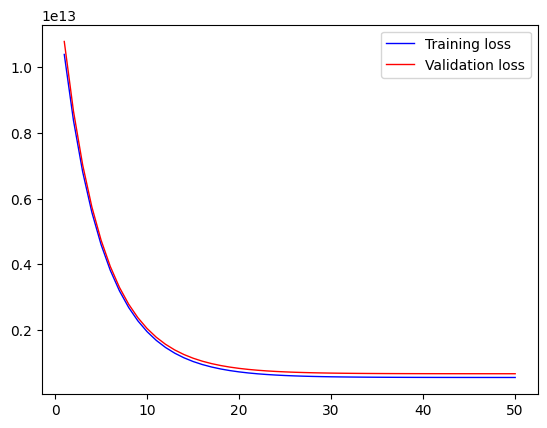

In [20]:
# Training hyperparameters
learning_rate = 0.1
regularization_parameter = 100
iterations = 50
theta_0 = np.zeros(X.shape[1])

# Train the model
theta, cost_h, validation_h = grad_desc(iterations, theta_0, learning_rate, regularization_parameter, X, Y, X_test, Y_test)

print("Theta:      ", theta)
print("Train Loss: ", cost_h[-5:])
print("Test Loss:  ", validation_h[-5:])

# Plot the results
plt.figure()
plt.plot(range(1, iterations+1), cost_h, color="blue", label="Training loss", linewidth=1)
plt.plot(range(1, iterations+1), validation_h, color="red", label="Validation loss", linewidth=1)
plt.legend();